<font size = 5><u><b> Data Wrangling </u></b><br> </font>
Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.<br><br>
The steps for Data Wrangling or Data Cleaning include: <br>
            - Handling Missing Data ( i. Identify missing data, ii. Remove or Replace )<br> 
            - Data Formating<br>
            - Data Normalization<br>
            - Binnning<br>

In [59]:
import pandas as pd
        
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv(path, names=headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<b> Identifying missing values </b><br>
 In this dataset, missing data is represented by "?". We will replace this "?" with NaN (Not a Number), Python's default missing valur marker. 
<br> We'll use the function replace(A, B, inplace = True) to replace A by B.

In [7]:
import numpy as np
df.replace("?", np.nan, inplace=True)
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


<b> Evaluating for missing values </b> <br>
There are two methods to detect missing data: <br>
1 .isnull() &ensp; and 2 .notnull()

In [9]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
#Counting missing values in each column

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print()

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

<h3 id="deal_missing_values">Deal with missing data</h3>
<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>

<font size = 2.7> <br> Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely. 
<br> We will apply different methods to rpelace data depending upon which is most reasonable

<p> Replace by mean - normalized-losses, stroke, bore, horsepower, peal-rpm <br>
Replace by frequency - num-of-doors <br>
Drop the whole row - price (since price is what we wanna predict)

In [13]:
#find avg of all columns and then replace
for col in ["normalized-losses", "bore", "horsepower", "peak-rpm"] :
    avg_col=df[col].astype('float').mean(axis=0)
    df[col].replace(np.nan, avg_col, inplace=True)

#find most frequently occuring value and replace 
max_num = df['num-of-doors'].value_counts().idxmax()     
df["num-of-doors"].replace(np.nan, max_num , inplace=True)

# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<b> Correct data types </b> <br>
The last step is checking and making sure that all data is in the correct format (int, float, text or other).

In Pandas, we use:

<p><code>.dtype()</code> to check the data type</p>
<p><code>.astype()</code> to change the data type</p>


In [19]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [30]:
#Converting data types to proper format
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

<h3> Data Standardization </h3>
Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.

In [34]:
# Convert mpg to L/100km by mathematical operation
df['city-mpg'] = 235/df["city-mpg"]
df['highway-mpg'] = 235/df['highway-mpg']

#renaming the columns
df.rename(columns= {"city-mpg":"city-L/100km"}, inplace=True)
df.rename(columns= {"highway-mpg":"highway-L/100km"}, inplace=True)

In [35]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0,13.055556,10.681818


In [53]:
#for deleting duplicate columns, expect the first occurence
df=df.T.drop_duplicates().T

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0,low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0,low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0,medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.84863,...,3.4,10.0,102,5500.0,9.791667,7.833333,13950.0,low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.84863,...,3.4,8.0,115,5500.0,13.055556,10.681818,17450.0,low,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,3.15,9.5,114,5400.0,10.217391,8.392857,16845.0,low,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,3.15,8.7,160,5300.0,12.368421,9.4,19045.0,medium,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,2.87,8.8,134,5500.0,13.055556,10.217391,21485.0,medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,3.4,23.0,106,4800.0,9.038462,8.703704,22470.0,low,1,0


<h3> Data Normalisation </h3>
Normalization is the process of transforming values of several variables into a similar range.

In [38]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max() 

# show the scaled columns
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


<h3> Binning </h3>
Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.

In [40]:
#converting into correct dtype
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower bins')

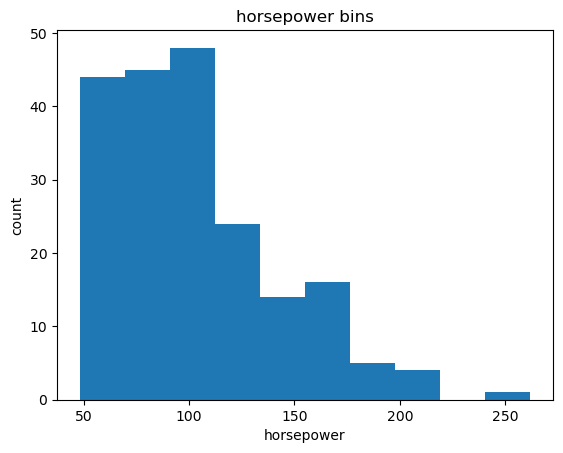

In [42]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist( df['horsepower'])

plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

We would like 3 bins of equal size bandwidth so we use numpy's <br>
linspace(start_value, end_value, numbers_generated) function.

In [45]:
start, end=min(df["horsepower"]), max(df["horsepower"])
bins = np.linspace(start, end, 4)

group_names = ['low', 'medium', 'high']

df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels= group_names, include_lowest = True)
df[['horsepower', 'horsepower-binned']].head(15)

,horsepower,horsepower-binned
0,111,low
1,111,low
2,154,medium
3,102,low
4,115,low
5,110,low
6,110,low
7,110,low
8,140,medium
9,101,low


In [46]:
df["horsepower-binned"].value_counts()

low       153
medium     43
high        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

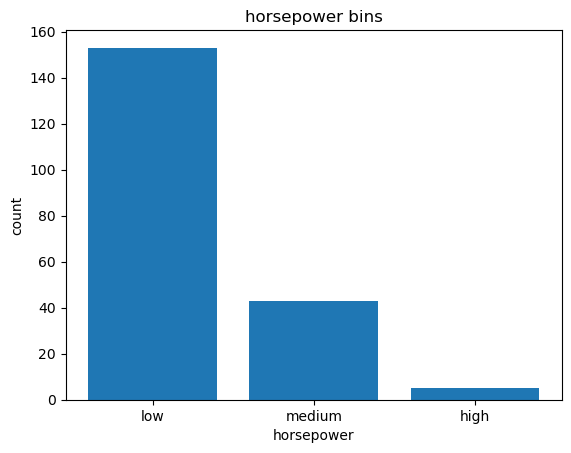

In [49]:
#plotting the distribution of each bin
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<h3>Indicator Variable (or Dummy Variable)</h3> 
An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. <br>
We use indicator variables so we can use categorical variables for regression analysis in the later modules.

<p> <b> for example </b> <br>
The column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" to indicator variables. </p>

In [51]:
#an indicater variable assigned to dummy_variable_1
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [58]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
#df.drop("fuel-type", axis = 1, inplace=True)

df= df.T.drop_duplicates().T
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0,low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0,low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0,medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.84863,...,3.4,10.0,102,5500.0,9.791667,7.833333,13950.0,low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.84863,...,3.4,8.0,115,5500.0,13.055556,10.681818,17450.0,low,0,1
